# This is the analysis of earthquakes which have happened around the world
* Graphing them to find a relation. As there are not many features, the types of graphs will be limited.
* Try to comment on them yourself

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print("Libraries are imported!")

Libraries are imported!


In [2]:
data = pd.read_csv("earthquakes.csv", sep = ',')
data.head(-5)

,Date,Latitude,Longitude,Magnitude
0,01/02/1965,19.2460,145.6160,6.0
1,01/04/1965,1.8630,127.3520,5.8
2,01/05/1965,-20.5790,-173.9720,6.2
3,01/08/1965,-59.0760,-23.5570,5.8
4,01/09/1965,11.9380,126.4270,5.8
...,...,...,...,...
23402,12/24/2016,-5.1460,153.5166,5.8
23403,12/25/2016,-43.4029,-73.9395,7.6
23404,12/25/2016,-43.4810,-74.4771,5.6
23405,12/27/2016,45.7192,26.5230,5.6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       23412 non-null  object 
 1   Latitude   23412 non-null  float64
 2   Longitude  23412 non-null  float64
 3   Magnitude  23412 non-null  float64
dtypes: float64(3), object(1)
memory usage: 731.8+ KB


In [6]:
data_old = data.copy()
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', utc = True)

data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

data.head(-5)

,Date,Latitude,Longitude,Magnitude,year,month,day
0,1965-01-02 00:00:00+00:00,19.2460,145.6160,6.0,1965,1,2
1,1965-01-04 00:00:00+00:00,1.8630,127.3520,5.8,1965,1,4
2,1965-01-05 00:00:00+00:00,-20.5790,-173.9720,6.2,1965,1,5
3,1965-01-08 00:00:00+00:00,-59.0760,-23.5570,5.8,1965,1,8
4,1965-01-09 00:00:00+00:00,11.9380,126.4270,5.8,1965,1,9
...,...,...,...,...,...,...,...
23402,2016-12-24 00:00:00+00:00,-5.1460,153.5166,5.8,2016,12,24
23403,2016-12-25 00:00:00+00:00,-43.4029,-73.9395,7.6,2016,12,25
23404,2016-12-25 00:00:00+00:00,-43.4810,-74.4771,5.6,2016,12,25
23405,2016-12-27 00:00:00+00:00,45.7192,26.5230,5.6,2016,12,27


In [7]:
data.drop(['Date'], axis = 1, inplace = True)
data.describe()

,Latitude,Longitude,Magnitude,year,month,day
count,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000
mean,1.679033,39.639961,5.882531,1992.632411,6.537887,15.681488
std,30.113183,125.511959,0.423066,14.426100,3.454541,8.670775
min,-77.080000,-179.997000,5.500000,1965.000000,1.000000,1.000000
25%,-18.653000,-76.349750,5.600000,1981.000000,4.000000,8.000000
50%,-3.568500,103.982000,5.700000,1993.000000,7.000000,16.000000
75%,26.190750,145.026250,6.000000,2005.000000,10.000000,23.000000
max,86.005000,179.998000,9.100000,2016.000000,12.000000,31.000000


In [9]:
data.isnull().sum()

Latitude     0
Longitude    0
Magnitude    0
year         0
month        0
day          0
dtype: int64

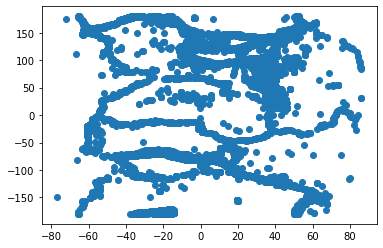

In [10]:
plt.scatter(x = 'Latitude', y = 'Longitude', data= data)
plt.show()

* Hard to tell something

<Figure size 432x288 with 0 Axes>

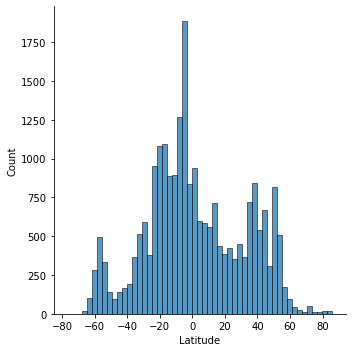

<Figure size 432x288 with 0 Axes>

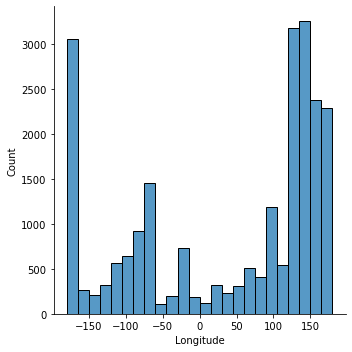

<Figure size 432x288 with 0 Axes>

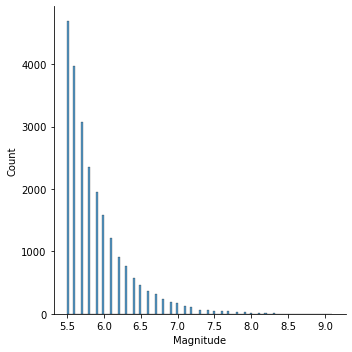

<Figure size 432x288 with 0 Axes>

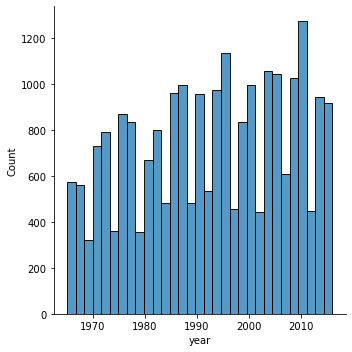

<Figure size 432x288 with 0 Axes>

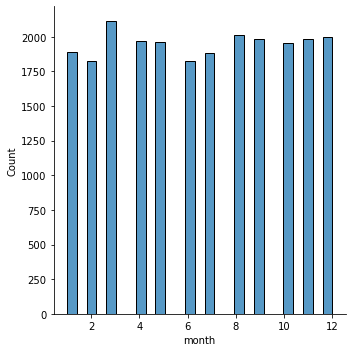

<Figure size 432x288 with 0 Axes>

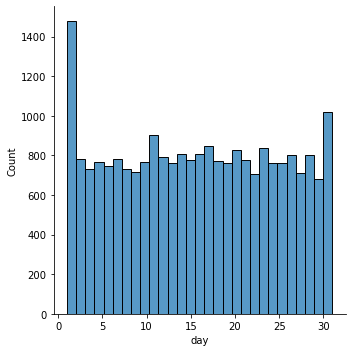

In [24]:
import seaborn as sns
for each in data.columns:
    plt.figure(each)
    sns.displot(data, x = each)
    plt.show()

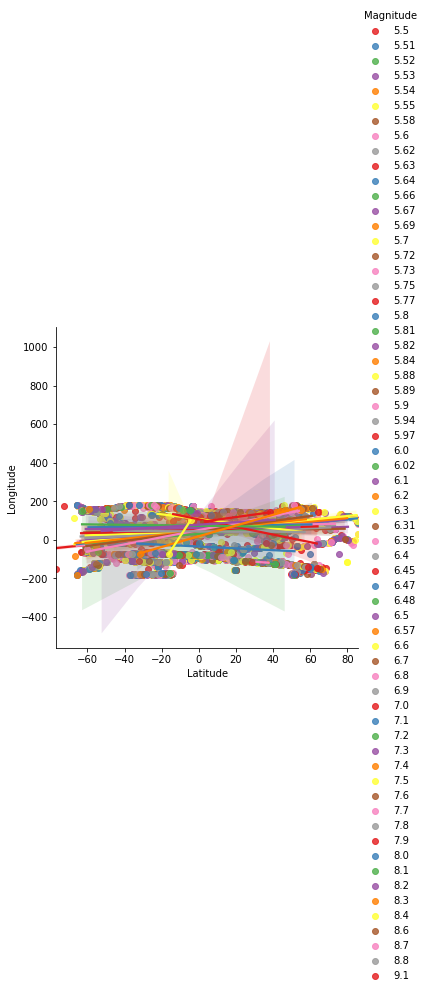

In [33]:
sns.lmplot(x="Latitude", y="Longitude", hue="Magnitude", data=data,
           palette="Set1");

In [34]:
df_7 = data[data['Magnitude'] > 6.99]
df_7.head()

,Latitude,Longitude,Magnitude,year,month,day
11,-2.608,125.952,8.2,1965,1,24
16,51.251,178.715,8.7,1965,2,4
26,51.443,179.605,7.3,1965,2,4
62,-25.633,-70.679,7.0,1965,2,23
87,36.405,70.724,7.4,1965,3,14


In [36]:
df_7.reset_index(drop = True, inplace = True)
df_7.tail()

,Latitude,Longitude,Magnitude,year,month,day
733,-37.3586,179.1461,7.0,2016,9,1
734,-42.7358,173.0499,7.8,2016,11,13
735,-10.6787,161.3214,7.8,2016,12,8
736,-4.5049,153.5216,7.9,2016,12,17
737,-43.4029,-73.9395,7.6,2016,12,25


In [37]:
df_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   738 non-null    float64
 1   Longitude  738 non-null    float64
 2   Magnitude  738 non-null    float64
 3   year       738 non-null    int64  
 4   month      738 non-null    int64  
 5   day        738 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 34.7 KB


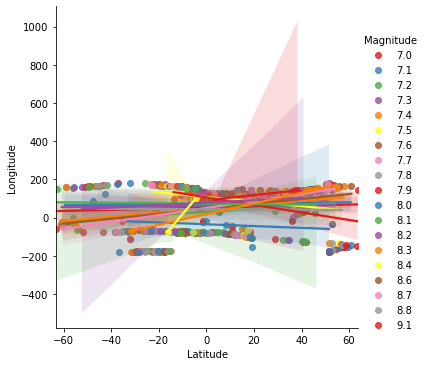

In [38]:
sns.lmplot(x="Latitude", y="Longitude", hue="Magnitude", data=df_7,
           palette="Set1");

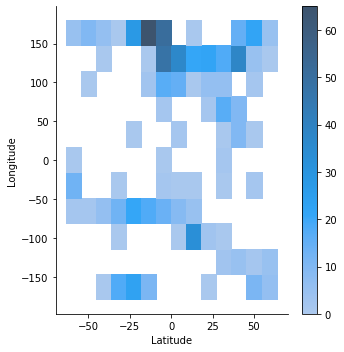

In [42]:
sns.displot(df_7, x = 'Latitude', y = 'Longitude', cbar=True)

In [52]:
threshold = df_7['Magnitude'] < 7.5
threshold

0      False
1      False
2       True
3       True
4       True
       ...  
733     True
734    False
735    False
736    False
737    False
Name: Magnitude, Length: 738, dtype: bool

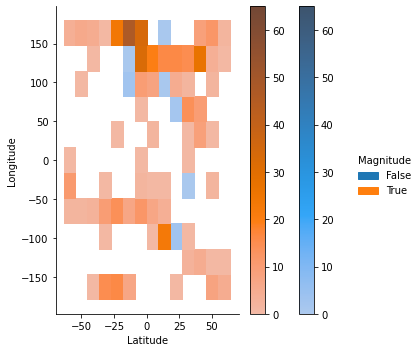

In [53]:
sns.displot(df_7, x = 'Latitude', y = 'Longitude', hue = threshold, cbar=True)

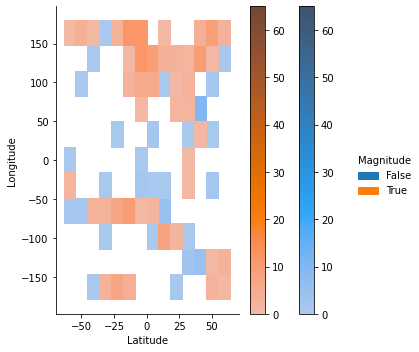

In [54]:
threshold = df_7['Magnitude'] > 7.5
sns.displot(df_7, x = 'Latitude', y = 'Longitude', hue = threshold, cbar=True)

In [56]:
df_7[['Latitude', 'Longitude', 'Magnitude']].describe()

,Latitude,Longitude,Magnitude
count,738.000000,738.000000,738.000000
mean,4.072509,56.349994,7.333875
std,28.495830,118.775191,0.342576
min,-63.398000,-179.575000,7.000000
25%,-15.138000,-70.752075,7.100000
50%,-1.718000,122.422000,7.200000
75%,27.929000,150.721250,7.500000
max,63.952000,179.791000,9.100000


In [57]:
df_dense = df_7[(df_7['Longitude'] > 150) & df_7['Latitude'].between(-25,0)]
df_dense.head(10)

,Latitude,Longitude,Magnitude,year,month,day
7,-14.921,167.340,7.7,1965,5,20
12,-15.449,166.980,7.2,1965,8,11
13,-15.861,167.092,7.6,1965,8,11
14,-15.871,166.960,7.4,1965,8,13
15,-16.198,167.607,7.2,1965,8,13
19,-10.318,161.006,7.1,1966,6,15
25,-12.091,166.552,7.8,1966,12,31
26,-12.326,166.491,7.1,1966,12,31
37,-5.208,153.742,7.2,1967,12,25
39,-5.420,153.368,7.3,1968,2,12


In [58]:
df_dense.describe()

,Latitude,Longitude,Magnitude,year,month,day
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,-12.266262,162.676948,7.291241,1991.700730,6.591241,15.364964
std,5.675024,7.226267,0.289897,16.318685,3.573914,8.723595
min,-23.884000,150.196000,7.000000,1965.000000,1.000000,1.000000
25%,-16.198000,154.999000,7.100000,1977.000000,4.000000,8.000000
50%,-11.481000,165.931000,7.200000,1993.000000,7.000000,15.000000
75%,-6.754700,167.518000,7.500000,2007.000000,10.000000,21.000000
max,-3.917000,178.860000,8.100000,2016.000000,12.000000,31.000000


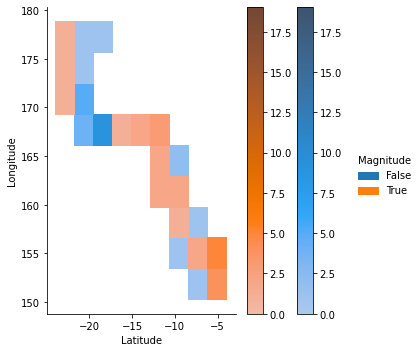

In [71]:
threshold = df_dense['Magnitude'] > 7.5
sns.displot(df_dense, x = 'Latitude', y = 'Longitude', hue = threshold, cbar= True)

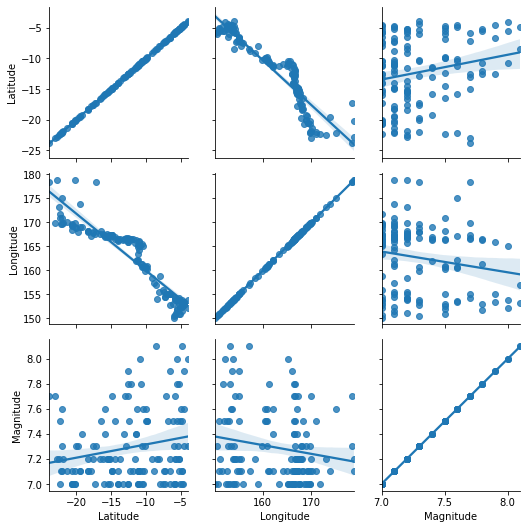

In [70]:
g = sns.PairGrid(data = df_dense[['Latitude', 'Longitude', 'Magnitude']])
g.map(sns.regplot)

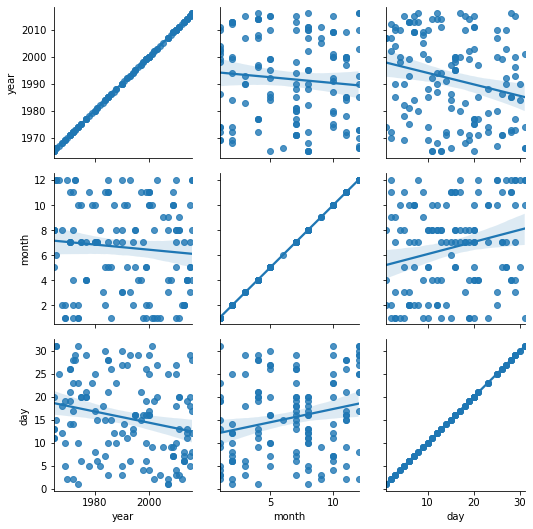

In [73]:
g = sns.PairGrid(data = df_dense[['year', 'month', 'day']])
g.map(sns.regplot)

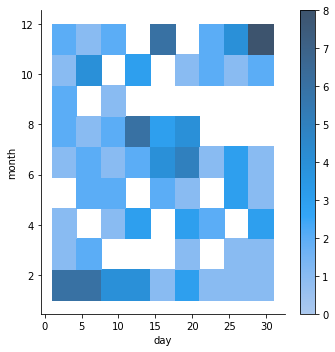

In [75]:
sns.displot(df_dense, x = 'day', y = 'month', cbar = True)

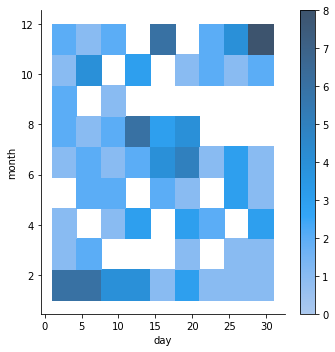

In [76]:
sns.displot(df_dense, x = 'day', y = 'month', cbar = True)

* Month 10 - 12 && Day 15-20 

<Figure size 432x288 with 0 Axes>

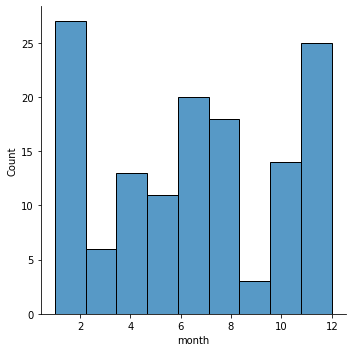

<Figure size 432x288 with 0 Axes>

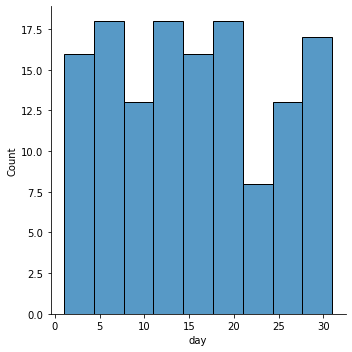

<Figure size 432x288 with 0 Axes>

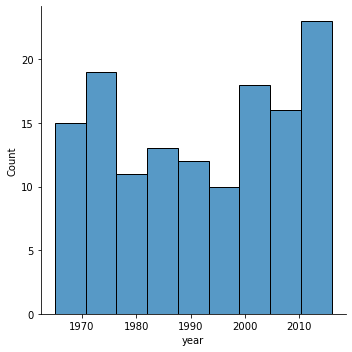

In [85]:
list_g = ['month', 'day', 'year']
for each in list_g:
    plt.figure(each)
    sns.displot(df_dense, x = each)
    plt.show()

* It can be seen that they are arbitrary